In [3]:
import sys,os
sys.path.append('/Users/tangweiyi/Desktop/lib_py')
import numpy as np
import pandas as pd
from Bio.PDB.PDBParser import PDBParser
import pack_analysisV3 as pack

import matplotlib.pyplot as plt
import itertools



In [9]:
# chainABC_str      ='AB'
# chainX_str        ='X'
chainABC_str = sys.argv[2]
chainX_str=sys.argv[3]
input_dir=sys.argv[1]
dir_files = os.listdir(input_dir)
pdb_files = [x for x in dir_files if x[-3:] == 'pdb']

parser   =PDBParser(QUIET=1)
num_knobs=np.zeros((len(pdb_files),7))

# for num in np.arange(0,401):   
	
# 	print("now it is ", num)

# 	input_PDB_name='design_input_struct-Full-target_001_%s.pdb'%str(num).zfill(4)
    
for input_PDB_name in pdb_files: 
	protein  = parser.get_structure(input_PDB_name,input_PDB_name)[0]

	sum1,sum2,sum3,sum4,sum5,sum6,finalscore   =pack.excute(protein)
	num_knobs[num][0]=sum1
	num_knobs[num][1]=sum2
	num_knobs[num][2]=sum3
	num_knobs[num][3]=sum4
	num_knobs[num][4]=sum5
	num_knobs[num][5]=sum6
	num_knobs[num][6]=finalscore


In [57]:
knobs=num_knobs.T
knobsABC=knobs[:5:2]
knobsX= knobs[1:6:2]
knobsum=knobsABC+knobsX
print(knobsum)
num=num_knobs
for i in range(len(num_knobs)):
    
    print(num[i][0]+num[i][1],num[i][2]+num[i][3],num[i][4]+num[i][5])

[[20. 15. 15. ... 21. 21. 20.]
 [13. 11. 11. ... 16. 16. 15.]
 [ 8.  4.  4. ...  7.  7.  6.]]
20.0 13.0 8.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
18.0 14.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 4.0
15.0 11.0 

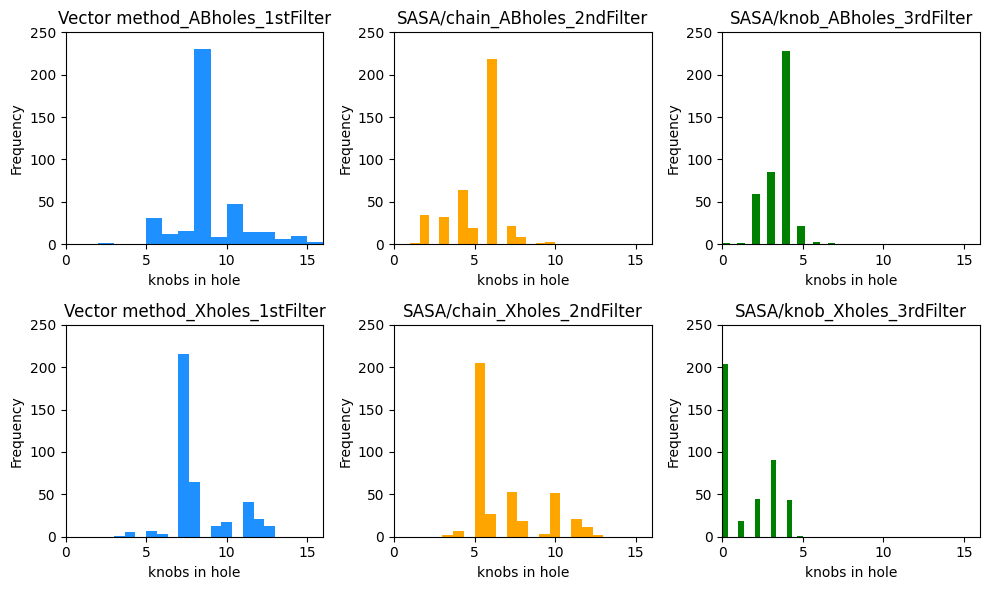

In [37]:

fig,axes = plt.subplots(2,3,figsize=(10,6))
ax0,ax1,ax2,ax3,ax4,ax5=axes.flatten()
# colors=plt.cm.Spectral([0,1,2])

ax0.hist(knobs[0],15, histtype='bar',color='dodgerblue')
ax0.set(xlim=[0,16],ylim=[0,250],title='Vector method_ABholes_1stFilter',ylabel='Frequency',xlabel='knobs in hole')
ax1.hist(knobs[2],15,density=False, histtype='bar',color='orange')
ax1.set(xlim=[0,16],ylim=[0,250],title='SASA/chain_ABholes_2ndFilter',ylabel='Frequency',xlabel='knobs in hole')
ax2.hist(knobs[4],15,density=False, histtype='bar',color='g')
ax2.set(xlim=[0,16],ylim=[0,250],title='SASA/knob_ABholes_3rdFilter',ylabel='Frequency',xlabel='knobs in hole')


ax3.hist(knobs[1],15,density=False, histtype='bar',color='dodgerblue')
ax3.set(xlim=[0,16],ylim=[0,250],title='Vector method_Xholes_1stFilter',ylabel='Frequency',xlabel='knobs in hole')
ax4.hist(knobs[3],15,density=False, histtype='bar',color='orange')
ax4.set(xlim=[0,16],ylim=[0,250],title='SASA/chain_Xholes_2ndFilter',ylabel='Frequency',xlabel='knobs in hole')
ax5.hist(knobs[5],15,density=False, histtype='bar',color='g')
ax5.set(xlim=[0,16],ylim=[0,250],title='SASA/knob_Xholes_3rdFilter',ylabel='Frequency',xlabel='knobs in hole')

fig.tight_layout()
plt.show()



In [ ]:
print

/Users/tangweiyi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tangweiyi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tangweiyi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

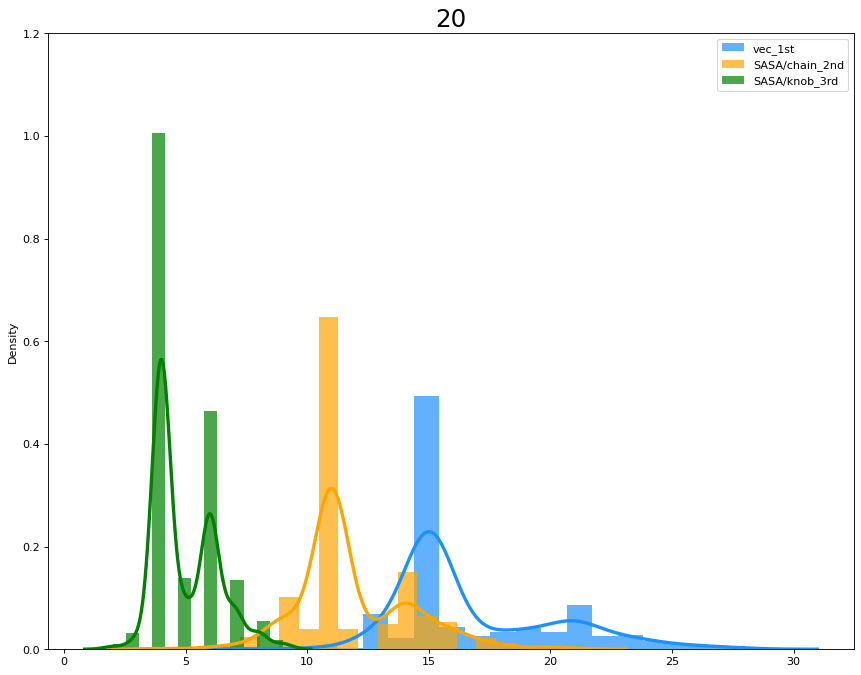

In [54]:
import seaborn as sns
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(knobsum[0], color="dodgerblue", label="vec_1st", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(knobsum[1], color="orange", label="SASA/chain_2nd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(knobsum[2], color="g", label="SASA/knob_3rd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


plt.ylim(0, 1.2)

# Decoration
plt.title('20', fontsize=22)
plt.legend()
plt.show()

/Users/tangweiyi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


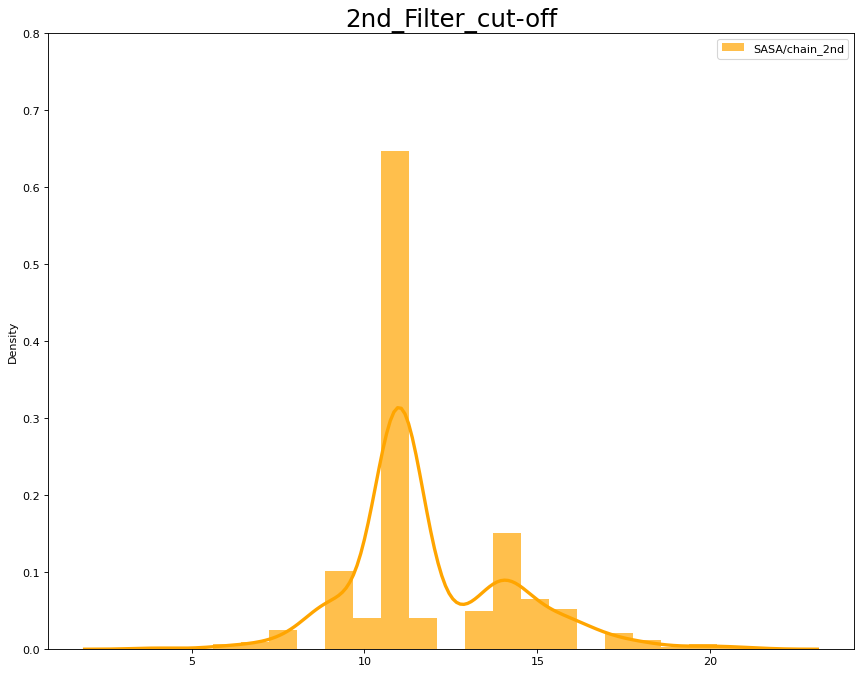

In [60]:
import seaborn as sns
plt.figure(figsize=(13,10), dpi= 80)
# sns.distplot(knobsum[0], color="dodgerblue", label="vec_1st", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(knobsum[1], color="orange", label="SASA/chain_2nd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
# sns.distplot(knobsum[2], color="g", label="SASA/knob_3rd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


plt.ylim(0, 0.8)

# Decoration
plt.title('2nd_Filter_cut-off', fontsize=22)
plt.legend()
plt.show()

/Users/tangweiyi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


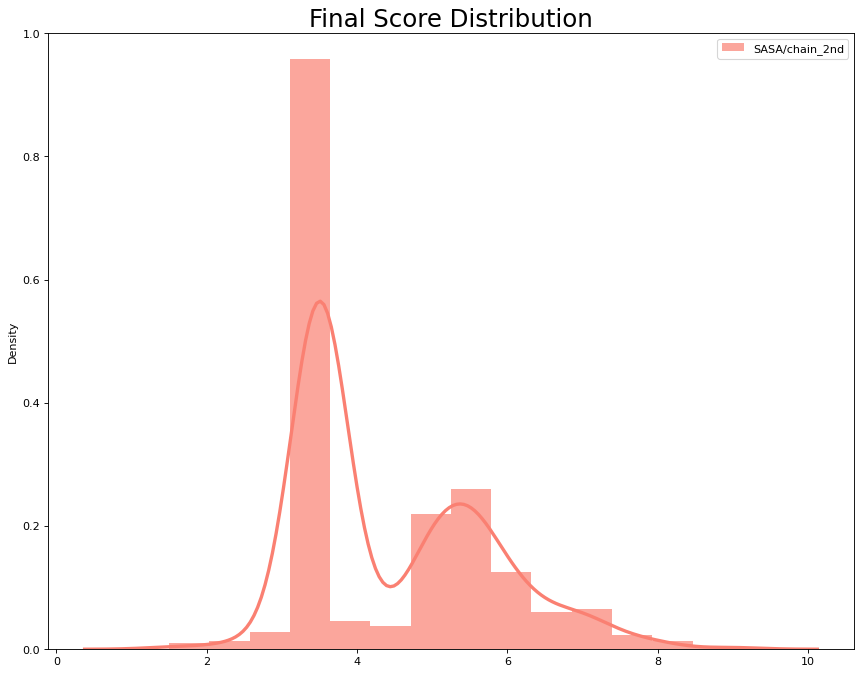

In [63]:
import seaborn as sns
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(knobs[6], color="salmon", label="SASA/chain_2nd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


plt.ylim(0, 1)

# Decoration
plt.title('Final Score Distribution', fontsize=22)
plt.legend()
plt.show()